In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

### 1D Ising model with 2 sites and hopping term

In [4]:
## Physical quantaties
J = 0.5
h = 1

## Gates
Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
I = np.identity(2)

## States
state_0 = np.array([1,0])
state_1 = np.array([0,1])

state_0a = np.kron(state_0, state_0)
state_0b = np.kron(state_0, state_1)
state_1a = np.kron(state_1, state_0)
state_1b = np.kron(state_1, state_1)

## Projections
proj_0a = np.outer(state_0a, state_0a)
proj_0b = np.outer(state_0b, state_0b)
proj_1a = np.outer(state_1a, state_1a)
proj_1b = np.outer(state_1b, state_1b)

## Hamiltonian
H = 'J * np.kron(Z, Z) + h * np.kron(X, I) + h * np.kron(I, X)'

['J * np.kron(Z, Z) ', ' h * np.kron(X, I) ', ' h * np.kron(I, X)']

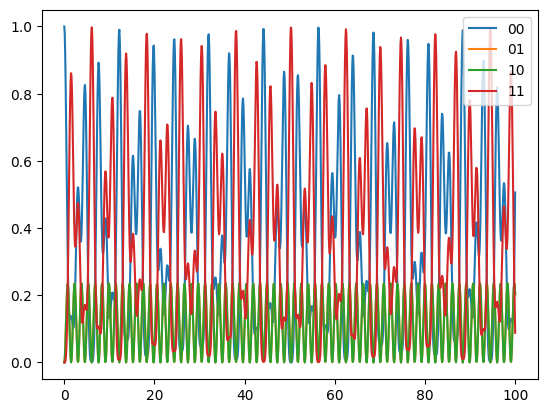

In [53]:
## Exact time evolution
H_exact = eval(H)
initial_state = state_0a

t_max = 100
dt = 0.1
t = np.linspace(0, t_max, int(t_max/dt))
t = t[...,None, None]                        #reshape to be able to broadcast into H

U_t = expm(-1j*H_exact*t)

psi_t = U_t @ initial_state

exact_0a = np.linalg.norm(proj_0a @ psi_t[...,None], axis=1)**2
exact_0b = np.linalg.norm(proj_0b @ psi_t[...,None], axis=1)**2
exact_1a = np.linalg.norm(proj_1a @ psi_t[...,None], axis=1)**2
exact_1b = np.linalg.norm(proj_1b @ psi_t[...,None], axis=1)**2

plt.plot(t[:,0], exact_0a, label = '00')
plt.plot(t[:,0], exact_0b, label = '01')
plt.plot(t[:,0], exact_1a, label = '10')
plt.plot(t[:,0], exact_1b, label = '11')

plt.legend()

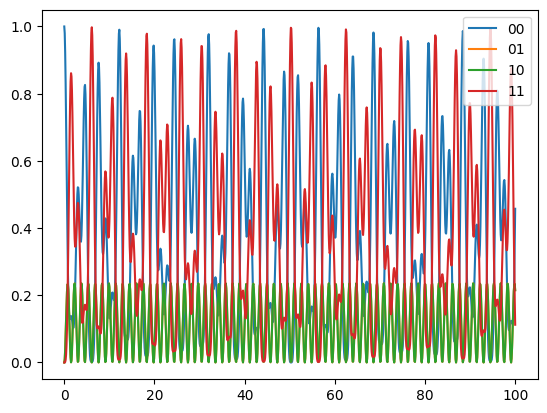

In [54]:
## Trotterization
initial_state = state_0a                     #Set initial state equal to 00

n = 1000                                        #number of Trotter steps
t_max = 100
dt = 0.1
t = np.linspace(0, t_max, int(t_max/dt))
t = t[...,None, None]                        #reshape to be able to broadcast into H

# Split the Hamiltonian and create unitaries
for i, term in enumerate(H.split('+')):
    globals()[f"U_{i}"] = expm(-1j*eval(term)*t/n)

U_t = (U_0 @ U_1 @ U_2)
#Repeat for number of Trotter steps
for i in range(n - 1):
    U_t = U_t @ (U_0 @ U_1 @ U_2)

psi_t = U_t @ initial_state

trotter_0a = np.linalg.norm(proj_0a @ psi_t[...,None], axis=1)**2
trotter_0b = np.linalg.norm(proj_0b @ psi_t[...,None], axis=1)**2
trotter_1a = np.linalg.norm(proj_1a @ psi_t[...,None], axis=1)**2
trotter_1b = np.linalg.norm(proj_1b @ psi_t[...,None], axis=1)**2

plt.plot(t[:,0], trotter_0a, label = '00')
plt.plot(t[:,0], trotter_0b, label = '01')
plt.plot(t[:,0], trotter_1a, label = '10')
plt.plot(t[:,0], trotter_1b, label = '11')

plt.legend()

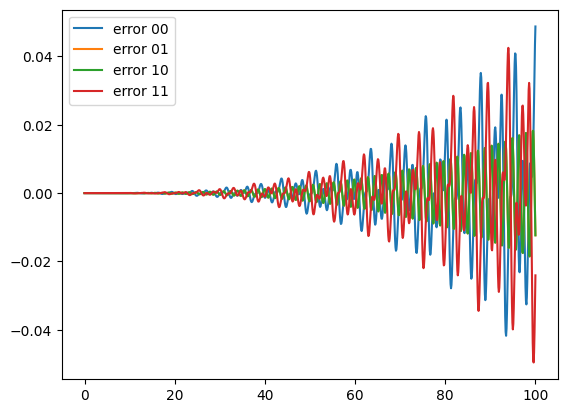

In [56]:
plt.plot(t[:,0], exact_0a - trotter_0a, label = 'error 00')
plt.plot(t[:,0], exact_0b - trotter_0b, label = 'error 01')
plt.plot(t[:,0], exact_1a - trotter_1a, label = 'error 10')
plt.plot(t[:,0], exact_1b - trotter_1b, label = 'error 11')

plt.legend()